# Homework 4: Problem 15

The goal of this problem is to gain some familiarity with signal processing. We will use the runge-kutta algorithm to solve the differential equation governing a low-pass filter numerically. While we won't be directly implementing the RK method, we will design the helper function it uses to calculate the derivative and a function that give the input signal.

A simple electronic circuit pictured in Fig. 2 contains one resistor and one capacitor.
This circuit acts as a low-pass filter: you send a signal in on the left, and it comes out filtered on the right. Using Ohm’s law and the laws governing capacitors, and assuming that the output load has very high impedance (so that a negligible amount of current flows through it), we can write down the equations governing this circuit as follows. Let I be the current that flows through R and into the capacitor, and let Q be the charge on the capacitor. Then

$$ IR = V_{in} − V_{out}$$
$$ Q = CV_{out} $$
$$ I = \frac{dQ}{dt} $$

Substituting the second equation into the third, then substituting that result into the first equation, we find that the voltage dynamics can be described as
$$ \frac{dV_{out}}{dt} = \frac{1}{RC}(V_{in}-V_{out}). $$

A) Write a program to solve this equation for $V_{out}(t)$ using the fourth-order Runge-Kutta method when the input signal is a square wave with frequency 1 and amplitude 1, i.e.
$$ V_{in}(t)=\left\{
    \begin{array}{rl}
1&\mbox{if }\lfloor 2t\rfloor \mbox{ is even}\\
-1&\mbox{if }\lfloor 2t \rfloor \mbox{ is odd}\\
\end{array}
\right.
$$
Use the program to make plots of the output of the filter circuit from $t = 0$ to $t = 10$ when R = 0.01, 0.1, and 1, with initial condition $V_{out} = 0.$ You will have to make a decision about what value of ∆t to use in your calculation. Small values give more accurate results, but the program will take longer to run. Try a variety of different values and choose one for your final calculations that seems sensible to you.

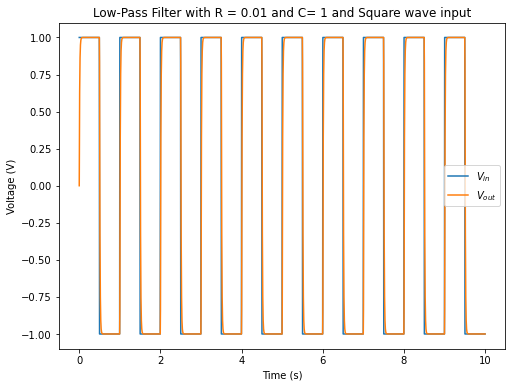

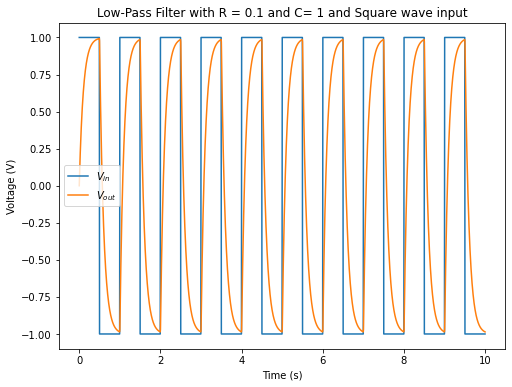

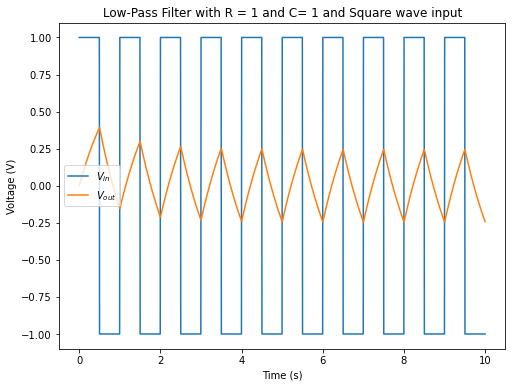

In [67]:
from nm4p.rk4 import rk4
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#set variables to hold plot dimensions
xsize=8# in inches
ysize=6#in inches

def square_wave(t):
    """Returns the specified square wave when give the time in seconds
    Params:
    t - the current time in seconds
    Returns:
        The square wave defined  evaluated at time t"""
    sqrwave = (-1)**(np.floor(2*t)% 2)
    return sqrwave

def v_out_derivs(x, t, params):
    """Generates the derivative for use in the rk4 routine at using the given parameters, such as the time to evaluate the derivative
    parameters
    x - the current value of V_out
    t- the current time t
    PARAMS: [r, c, v_in]
    r - the resistance of the resistor in the circuit
    c- the Capacitance of the capacitor in the circuit
    v_in - the input voltage function which to be evaluated at the current time t """
    r, c, v_in = params
    deriv = 1/(r*c)*(v_in(t)-x)
    return deriv
def lowpass_circuit(duration,v_in,v_out_init,r,c,tau):
    """A circuit that simulates and plots a low pass filter using rk4 and hte differential equaiton provided above

    Params:
    duration - how many simulated seconds the simulation should be evaluated for
    v_in - a function v_in(t) that specifies the input voltage the simulator should use
    v_out_init - the initial value for the output voltage of hte circuit-- v_out at t=0
    r - the resistance of the resistor in the simulated circuit
    c - the capacitance of the capacitor in the simulated circuit
    tau - the time-step of the simulation in seconds
    Returns:
        returns no output but plots v_out from time 0 to the specified number of simulated seconds

    """
    numsteps = int(np.ceil(duration/tau)) # calculate the step number from the specified duration and tau value
    V_out=np.empty(numsteps) # initialize array to hold output voltage
    V_out[0]=v_out_init # set the initial value for the output voltage at time 0

    time_array=np.zeros(numsteps) # set up time array for graphing against
    time_array[0] = 0
    for step in range(numsteps-1):
        V_out[step+1] = rk4(V_out[step],step*tau,tau,v_out_derivs,[r,c,v_in])#evaluate runge-kutta next step
        time_array[step+1]=(step+1)*tau#populate time array for graphing

    #plot output voltage vs time for both input and output voltages
    plt.figure(figsize=(xsize,ysize))
    plt.plot(time_array,square_wave(time_array),label="$V_{in}$")
    plt.plot(time_array,V_out,label="$V_{out}$")

    #Make plot pretty
    plt.legend()
    plt.ylabel("Voltage (V)")
    plt.xlabel("Time (s)")
    plt.title(f"Low-Pass Filter with R = {r} and C= {c} and Square wave input")

C=1# set capacitance for the simulations
TAU=0.005# largest timestep that prevented blowup for R=0.01 simulation

lowpass_circuit(10,square_wave,0,0.01,C,TAU)
lowpass_circuit(10,square_wave,0,0.1,C,TAU)
lowpass_circuit(10,square_wave,0,1,C,TAU)


B) Based on the graphs produced by your program, describe what you see and explain what the circuit is doing.

For low R values (R=0.01), the circuit barely affects the signal. This is cause the resistor and capacitor together act to make the output voltage lag behind hte input voltage, but a low resistance does not make that lag very noticeable. For a somewhat larger R value of 0.1, the lag becomes rather noticeable as the output voltage barely is able to catch up to the input voltage before the square wave switches sign. For R=1, the output voltage is kept close to zero as it is too slow to approach the input voltage as it switches sign too quickly for it, leaving a sort of sawtooth wave as the high frequencies are suppressed. For high resistance, the circuit screens out the high-frequency behavior that $V_{in}$ has. In short, the high frequencies of the input are screened while low frequencies are allowed through. The filtering process affects all frequencies to a small degree, but affects low frequencies minimally (and zero frequency not at all - if the input were a constant, the output would be one too!)

Conclusion:
It took a bit of time to figure out just how to properly pass values to the derivative function that gets called by rk4, but it wasn't too bad. This exercise brought back some memories of taking a class on circuits in undergrad, which was fun. This also links back to some fourier methods we're covering in my other classes this semester.